In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### 训练数据

(200, 1)
<class 'numpy.ndarray'>
(200, 1)


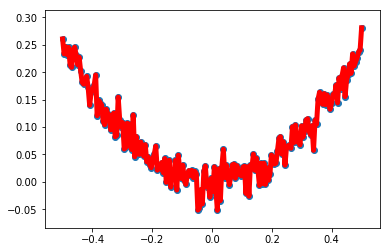

In [11]:
# 生成200个随机点，并改变其形状为200*1
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]             #在[-0.5,0.5]中生成等间距200个点   [:,np.newaxis]的作用为增加一个维度  (n,)数组到(n,1)数组的转换
noise = np.random.normal(0,0.02,x_data.shape)                  #噪音
y_data = np.square(x_data) + noise                             

#查看一下数据形状
print(x_data.shape)
print(type(x_data))
print(noise.shape)

plt.figure()
plt.scatter(x_data, y_data)
plt.plot(x_data, y_data,'r-', lw=5)
plt.show()

### 构建一个神经网络，用来计算给定x的值，预测y的值

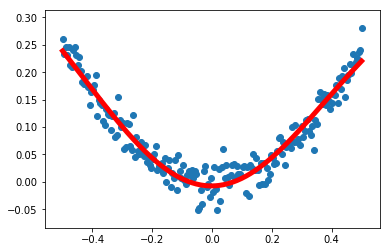

In [12]:
# 定义两个placeholder
x = tf.placeholder(tf.float32, [None,1])                         #定义列为1的占位符
y = tf.placeholder(tf.float32, [None,1])


Weights_L1 = tf.Variable(tf.random_normal([1,10]))               #定义中间层，一行10列
bias_L1 = tf.Variable(tf.zeros([1,10]))                          #一行10列 10个偏置值
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + bias_L1  

L1 = tf.nn.tanh(Wx_plus_b_L1)                                    #双曲正切函数作为激活函数


Weights_L2 = tf.Variable(tf.random_normal([10,1]))               # 定义输出层 10行1列
bias_L2 = tf.Variable(tf.zeros([1,1]))                           #一个偏置项
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + bias_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)                            #曲正切函数作为激活函数


loss = tf.reduce_mean(tf.square(y-prediction))                   # 二次代价函数（损失函数）
# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)    #定义优化（梯度下降法）

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())                  # 变量的初始化
    for _ in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})     # 传入数据
     #2000次迭代后，Weights_L2， bias_L2 ，Weights_L1  ，bias_L1 这些变量因优化算法train_step得到更新
    
    prediction_value = sess.run(prediction,feed_dict={x:x_data}) # 使用更新后Weights_L2， bias_L2 ，Weights_L1  ，bias_L1的获得预测值
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value,'r-', lw=5)
    plt.show()